# Using the KDE class

[![Open with marimo](https://marimo.io/shield.svg)](https://molab.marimo.io/github/lnccbrown/ssm-simulators/blob/first-marimo-tutorial/docs/tutorials/kde_class.ipynb)
[![Open with colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lnccbrown/ssm-simulators/blob/first-marimo-tutorial/docs/tutorials/kde_class.ipynb)

### Notebook Setup

In [1]:
import os

if ("COLAB_RELEASE_TAG" in os.environ):
    !pip install ssm-simulators


In [2]:
if any(["MARIMO" in item_ \
    for item_ in os.environ]):
    import marimo as mo
    mo.dependencies(pip=["ssm-simulators",
                         "pandas",
                         "matplotlib"
                         ])

### Bare-bones Tutorial

In [3]:
import ssms
from ssms.support_utils.kde_class import LogKDE
import numpy as np
from matplotlib import pyplot as plt

In [4]:
sim_out = ssms.basic_simulators.simulator.simulator(model = 'ddm',
                                                    theta = dict(v = 1.0, a = 1.5, z = 0.5, t = 0.4),
                                                    n_samples = 50000
                                                    )

In [5]:
my_kde = LogKDE(sim_out,
                bandwidth_type = "silverman",
                auto_bandwidth = True,
                displace_t = False)

In [6]:
rt_data = {'rts': np.repeat(np.linspace(0, 10, 1000), 2),
           'choices': np.tile([-1, 1], 1000)}

In [7]:
test_lb = -66.6
kde_out = my_kde.kde_eval(data = rt_data,
                          log_eval = False)

(0.0, 10.0)

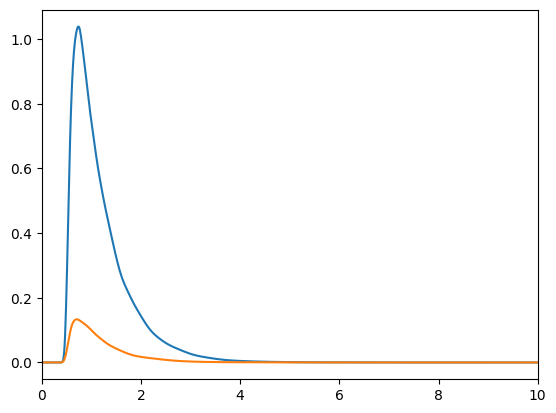

In [8]:
plt.plot(rt_data['rts'][rt_data['choices'] == 1], 
         kde_out[rt_data['choices'] == 1])
plt.plot(rt_data['rts'][rt_data['choices'] == -1], 
         kde_out[rt_data['choices'] == -1])
plt.xlim(0,10)